# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [7]:
def u_mean(items):
    total = 0
    count = 0
    for item in items:
        total += item
        count += 1
    return total / count

In [13]:
def u_var(items):
    mean = u_mean(items)
    sum_sq = 0
    count = 0
    for item in items:
        sum_sq += (mean - item) ** 2
        count += 1
    return sum_sq / count

In [14]:
def u_std(items):
    return u_var(items) ** (1/2)

In [15]:
amounts = np.array([3505, 2400, 3027, 2798, 3700, 3250, 2689])

In [16]:
print(u_mean(amounts), np.mean(amounts))

3052.714285714286 3052.714285714286


In [17]:
print(u_var(amounts), np.var(amounts))

183761.06122448976 183761.06122448976


In [18]:
print(u_std(amounts), np.std(amounts))

428.67360686714756 428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [19]:
cust = np.array([127, 80, 105, 92, 120, 115, 93])
covariance = np.cov(amounts, cust, ddof=0)
print(covariance)

[[183761.06122449   6518.02040816]
 [  6518.02040816    249.3877551 ]]


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [20]:
print((covariance[0][1]) / (u_std(amounts)*u_std(cus)))

0.9628339778148909


In [22]:
print(np.corrcoef(amounts, cust))

[[1.         0.96283398]
 [0.96283398 1.        ]]


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [23]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/'
                 'Cleaning-Titanic-Data/master/titanic_clean.csv', index_col = 0)

In [24]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [25]:
df.body = df.body.astype(str)

In [26]:
df_covar = df.select_dtypes('number').cov()
df_covar

,pclass,survived,age,sibsp,parch,fare,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,10.976961
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,0.174613


In [27]:
df_r = df.select_dtypes('number').corr()
df_r

,pclass,survived,age,sibsp,parch,fare,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,0.507253
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [29]:
print('Orthogonality = perpendicular')

Orthogonality = perpendicular


In [30]:
def plot_vector(ax, v, head_len, head_width, color):
  norm_v = np.linalg.norm(v)
  body_len_v = body_len_v = norm_v - head_len
  
  ax.arrow(0, 0, v[0]*body_len_v/norm_v, v[1]*body_len_v/norm_v, 
         head_width=0.1, head_length=head_len, fc=color, ec=color)

In [31]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2':

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

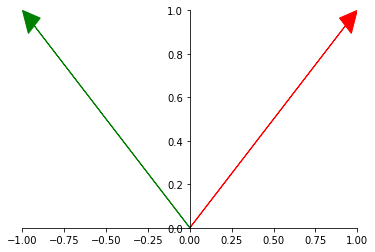

In [33]:
v = np.array([-1, 1])
u = np.array([1, 1])

ax = plt.axes()

head_len = 0.1
head_width = 0.05

# set the x-spine (see below for more info on `set_position`)
ax.spines['left'].set_position('zero')

# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()

# set the y-spine
ax.spines['bottom'].set_position('zero')

# turn off the top spine/ticks
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()

ax.set_xlim(-1, 1)

plot_vector(ax, v, head_len, head_width, 'g')
plot_vector(ax, u, head_len, head_width, 'r')

In [34]:
np.dot(u, v)

0

In [35]:
math.degrees(angle_between(u, v))

90.0

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [37]:
print('To see if these are orthogonal, let us check the dot product')

To see if these are orthogonal, let us check the dot product


In [45]:
a = np.array([-5, 3, 7])
b = np.array([6, -8, 2])
x = np.dot(a, b)
x


-40

In [46]:
math.degrees(angle_between(a, b))

115.50125386261944

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [47]:
c = np.array([2, -15, 6, 20])
print(np.linalg.norm(c)**2)
print(np.dot(c, c))
print(np.matmul(c.T, c))

665.0
665
665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1\end{bmatrix}
\qquad
e = 2 \begin{bmatrix} 1 \\ 0 \\ 0  \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0  \end{bmatrix} - 8\begin{bmatrix} 0 \\ 0 \\ 1  \end{bmatrix}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

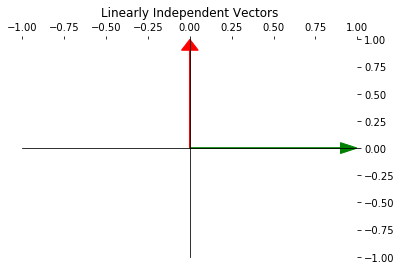

In [49]:
v = np.array([0, 1])
u = np.array([1, 0])

ax = plt.axes()

head_len = 0.1
head_width = 0.05

# set the x-spine (see below for more info on `set_position`)
ax.spines['left'].set_position('zero')

# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_right()

# set the y-spine
ax.spines['bottom'].set_position('zero')

# turn off the top spine/ticks
ax.spines['top'].set_color('none')
ax.xaxis.tick_top()

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_title('Linearly Independent Vectors')


plot_vector(ax, v, head_len, head_width, 'r')
plot_vector(ax, u, head_len, head_width, 'g')

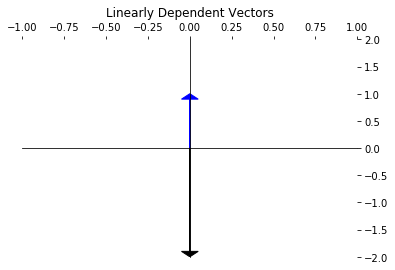

In [50]:
v = np.array([0, 1])
u = np.array([0, -2])

ax = plt.axes()

head_len = 0.1
head_width = 0.05

# set the x-spine (see below for more info on `set_position`)
ax.spines['left'].set_position('zero')

# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_right()

# set the y-spine
ax.spines['bottom'].set_position('zero')

# turn off the top spine/ticks
ax.spines['top'].set_color('none')
ax.xaxis.tick_top()

ax.set_xlim(-1, 1)
ax.set_ylim(-2, 2)
ax.set_title('Linearly Dependent Vectors')


plot_vector(ax, v, head_len, head_width, 'b')
plot_vector(ax, u, head_len, head_width, 'k')

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [51]:
np.linalg.eig(np.matrix('1 2; 4 8'))

(array([0., 9.]), matrix([[-0.89442719, -0.24253563],
         [ 0.4472136 , -0.9701425 ]]))

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

## 7.2 What does the rank of a matrix tell us?

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

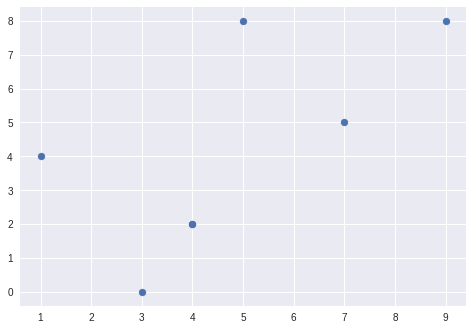

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()